In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
df.shape

(26707, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
df=df.drop(["unique_id","has_health_insur"],axis=1)

In [8]:
df.shape

(26707, 32)

#### Numerical data missing

In [9]:
num_missing=[ 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc','no_of_adults', 'no_of_children']

In [10]:
for feature in num_missing:
  df[feature].fillna(df[feature].median(), inplace=True)

#### Categorical data missing

In [11]:
cat_missing = ['qualification', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa']

In [12]:
for feature in cat_missing:
  df[feature].fillna(df[feature].mode().iloc[0], inplace=True)

In [13]:
df['census_msa'].mode().iloc[0]

'MSA, Not Principle  City'

In [14]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [15]:
duplicate=df.duplicated()

In [16]:
print(duplicate.sum())

13


In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
df.shape

(26694, 32)

In [19]:
df.reset_index(drop=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


#### histogram

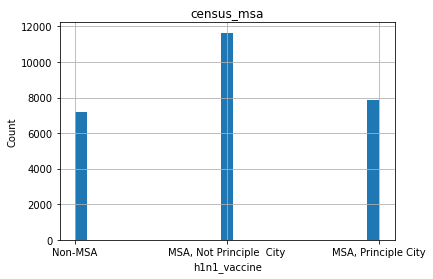

In [20]:
## checking the output
data=df.copy()
data[feature].hist(bins=25)
plt.xlabel("h1n1_vaccine")
plt.ylabel("Count")
plt.title(feature)plt.show()

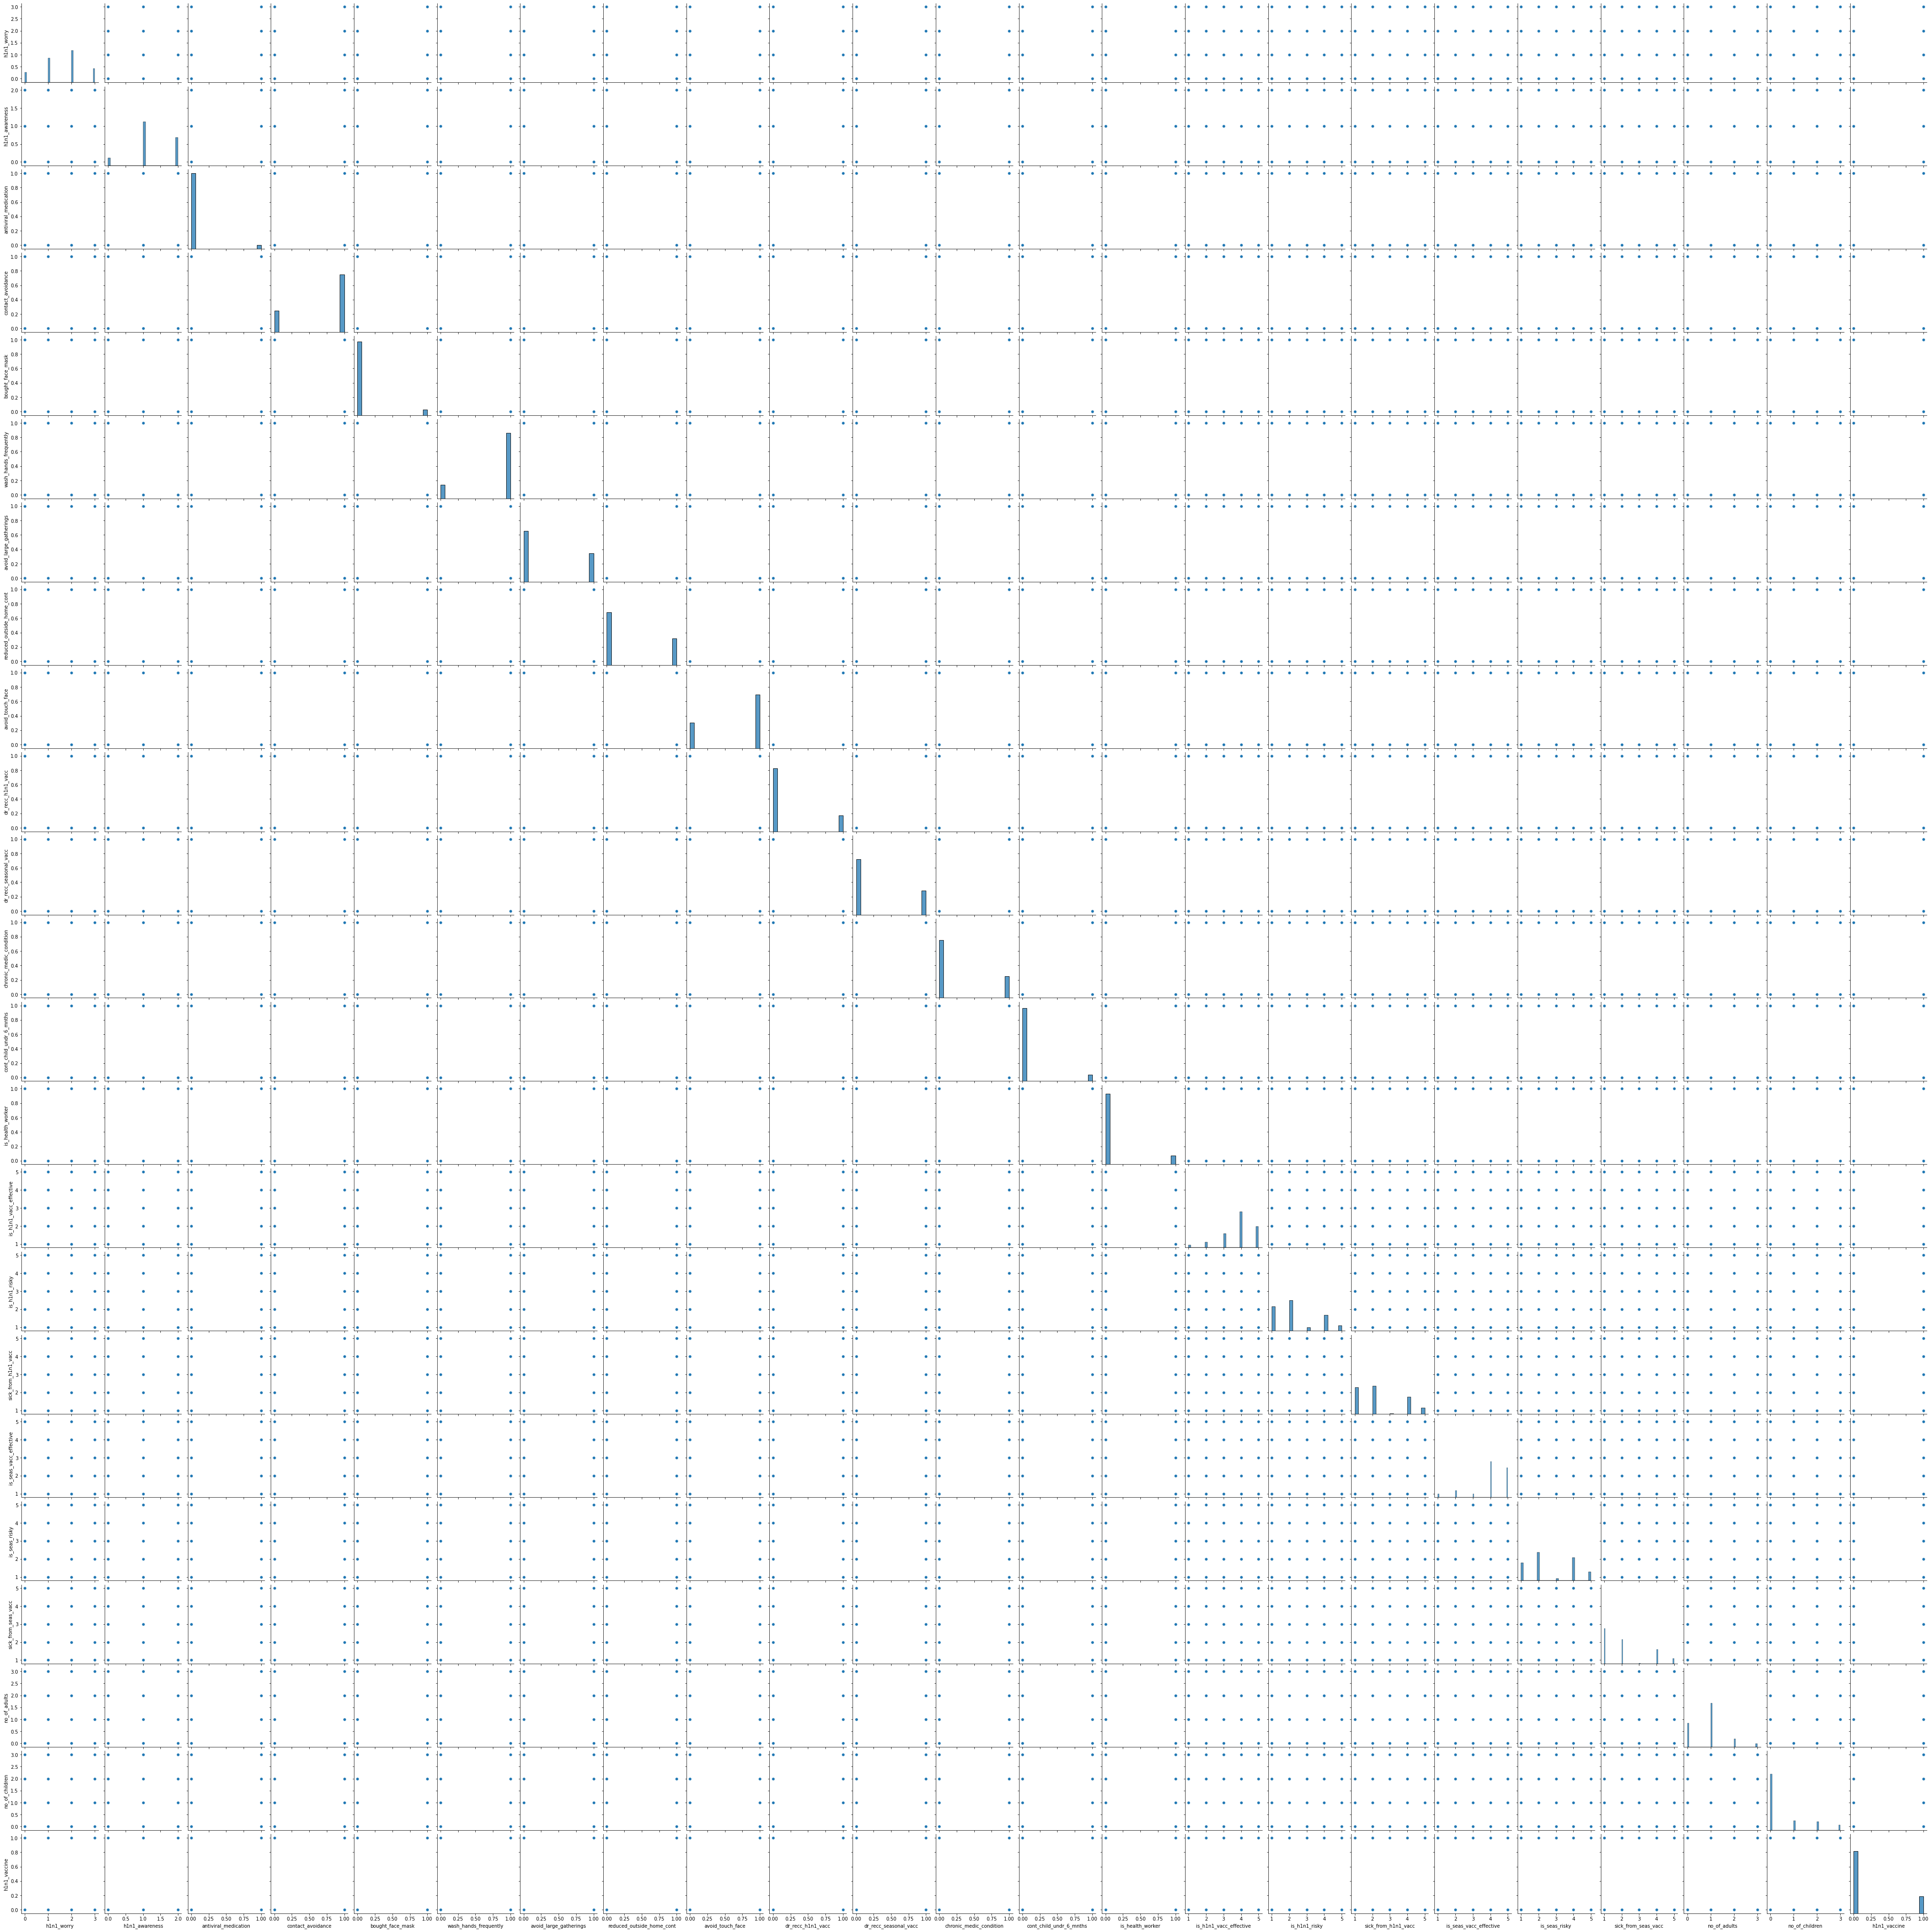

In [94]:
sns.pairplot(df)

#### Correlation matrix

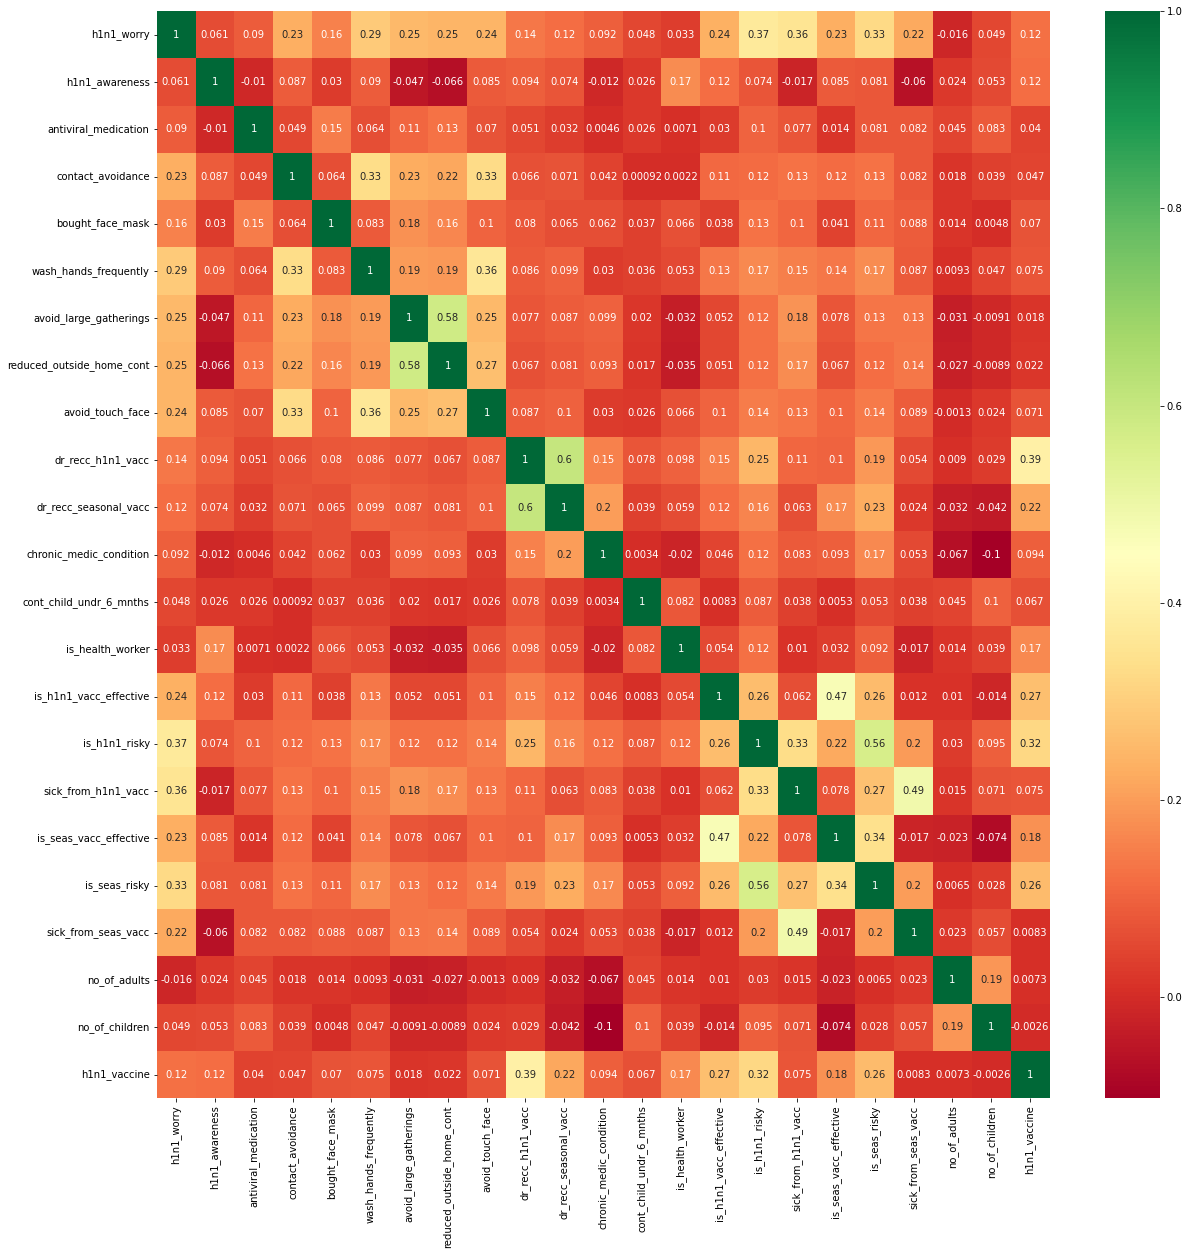

In [22]:
#get correlations of each features in dataset
data = df.copy()
corrmat = data.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
df.columns[:20]

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc'],
      dtype='object')

#### Outliers

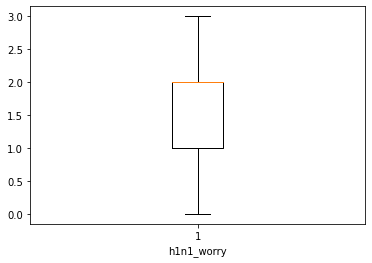

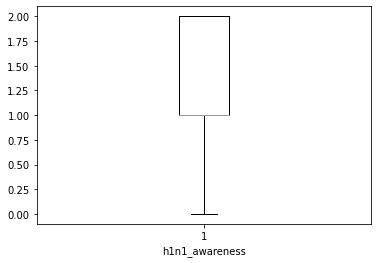

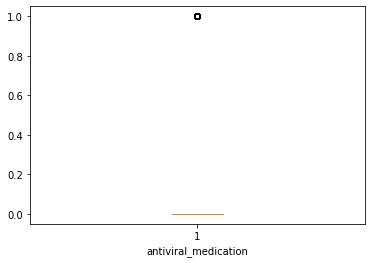

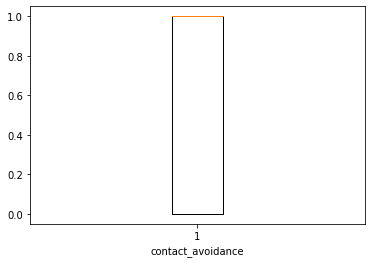

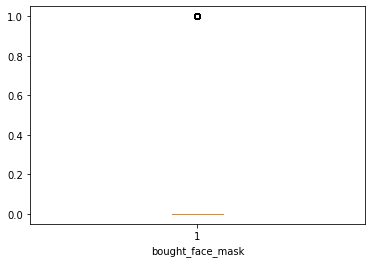

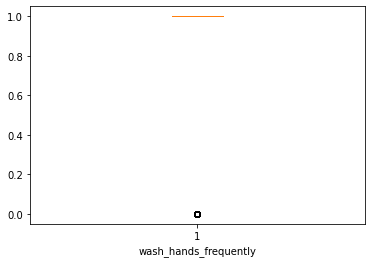

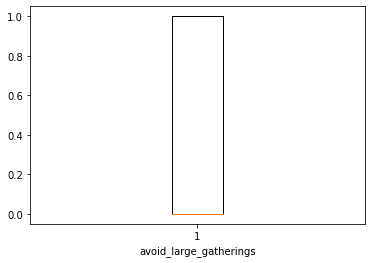

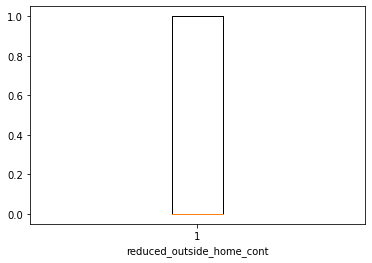

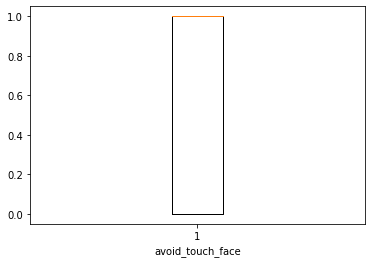

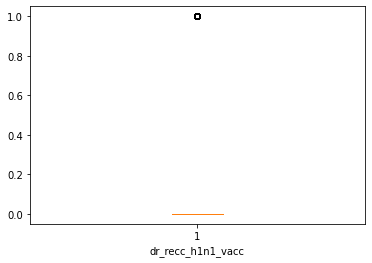

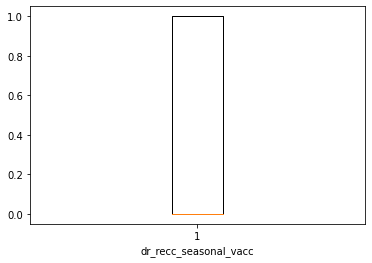

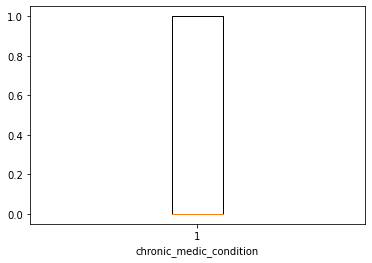

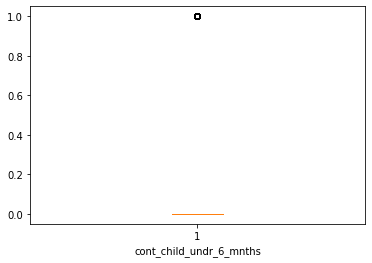

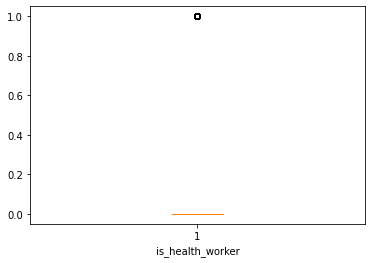

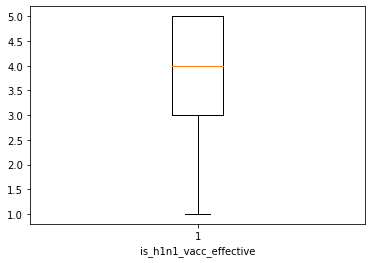

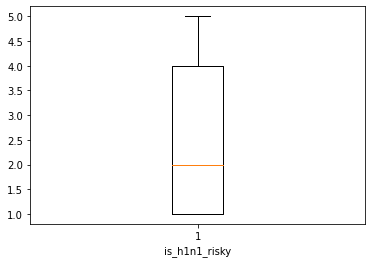

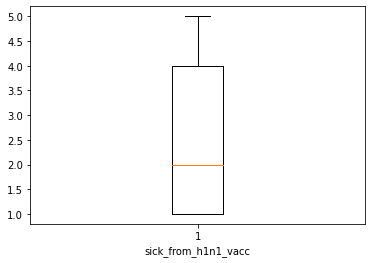

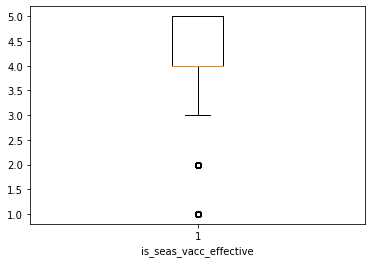

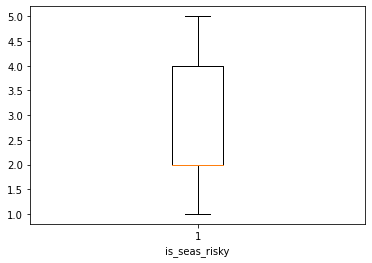

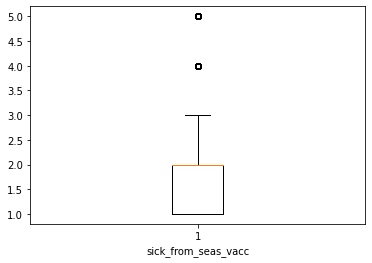

In [24]:
for feature in df.columns[:20]:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

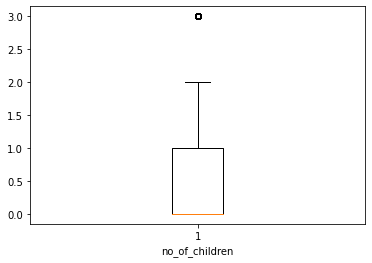

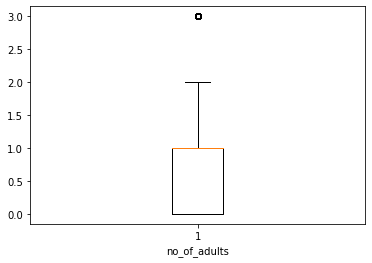

In [25]:
outlier = ['no_of_children', 'no_of_adults']
for feature in outlier:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [26]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=Q3+1.5*IQR
  return lower_range,upper_range

In [27]:
# for feature in df.columns[:20]:

#   low_leadtime,high_leadtime=remove_outlier(df[feature])
#   df[feature]=np.where(df[feature]>high_leadtime,high_leadtime,df[feature])
#   df[feature]=np.where(df[feature]<high_leadtime,high_leadtime,df[feature])


In [28]:
# for feature in df.columns[:20]:
#     data = df.copy()
#     plt.boxplot(data=data,x=feature)
#     plt.xlabel(feature)
#     plt.show()

#### One hot encoding

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
dummies=pd.get_dummies(X[["qualification","employment","income_level","is_seas_risky","cont_child_undr_6_mnths"]], drop_first=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26694 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26694 non-null  float64
 1   h1n1_awareness             26694 non-null  float64
 2   antiviral_medication       26694 non-null  float64
 3   contact_avoidance          26694 non-null  float64
 4   bought_face_mask           26694 non-null  float64
 5   wash_hands_frequently      26694 non-null  float64
 6   avoid_large_gatherings     26694 non-null  float64
 7   reduced_outside_home_cont  26694 non-null  float64
 8   avoid_touch_face           26694 non-null  float64
 9   dr_recc_h1n1_vacc          26694 non-null  float64
 10  dr_recc_seasonal_vacc      26694 non-null  float64
 11  chronic_medic_condition    26694 non-null  float64
 12  cont_child_undr_6_mnths    26694 non-null  float64
 13  is_health_worker           26694 non-null  flo

In [32]:
dummies=pd.get_dummies(X[['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']], drop_first=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26694 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26694 non-null  float64
 1   h1n1_awareness             26694 non-null  float64
 2   antiviral_medication       26694 non-null  float64
 3   contact_avoidance          26694 non-null  float64
 4   bought_face_mask           26694 non-null  float64
 5   wash_hands_frequently      26694 non-null  float64
 6   avoid_large_gatherings     26694 non-null  float64
 7   reduced_outside_home_cont  26694 non-null  float64
 8   avoid_touch_face           26694 non-null  float64
 9   dr_recc_h1n1_vacc          26694 non-null  float64
 10  dr_recc_seasonal_vacc      26694 non-null  float64
 11  chronic_medic_condition    26694 non-null  float64
 12  cont_child_undr_6_mnths    26694 non-null  float64
 13  is_health_worker           26694 non-null  flo

In [34]:
dummies.head()

,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0
4,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [35]:
X=pd.concat([X,dummies],axis=1)

In [36]:
X.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,1,1,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,0,1,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,1,1,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26694 entries, 0 to 26706
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   h1n1_worry                      26694 non-null  float64
 1   h1n1_awareness                  26694 non-null  float64
 2   antiviral_medication            26694 non-null  float64
 3   contact_avoidance               26694 non-null  float64
 4   bought_face_mask                26694 non-null  float64
 5   wash_hands_frequently           26694 non-null  float64
 6   avoid_large_gatherings          26694 non-null  float64
 7   reduced_outside_home_cont       26694 non-null  float64
 8   avoid_touch_face                26694 non-null  float64
 9   dr_recc_h1n1_vacc               26694 non-null  float64
 10  dr_recc_seasonal_vacc           26694 non-null  float64
 11  chronic_medic_condition         26694 non-null  float64
 12  cont_child_undr_6_mnths         

In [38]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
housing_status                object
e

In [39]:
dd =['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']

In [40]:
X.drop(dd,axis=1,inplace=True)

In [41]:
X.dtypes

h1n1_worry                        float64
h1n1_awareness                    float64
antiviral_medication              float64
contact_avoidance                 float64
bought_face_mask                  float64
wash_hands_frequently             float64
avoid_large_gatherings            float64
reduced_outside_home_cont         float64
avoid_touch_face                  float64
dr_recc_h1n1_vacc                 float64
dr_recc_seasonal_vacc             float64
chronic_medic_condition           float64
cont_child_undr_6_mnths           float64
is_health_worker                  float64
is_h1n1_vacc_effective            float64
is_h1n1_risky                     float64
sick_from_h1n1_vacc               float64
is_seas_vacc_effective            float64
is_seas_risky                     float64
sick_from_seas_vacc               float64
no_of_adults                      float64
no_of_children                    float64
age_bracket_35 - 44 Years           uint8
age_bracket_45 - 54 Years         

#### Splitting and Standardization

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
cls = LogisticRegression(max_iter=10000)
cls.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [46]:
y_pred = cls.predict(X_test)
y_pred1 = cls.predict(X_train)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, mean_squared_error

In [48]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 83.3 %
train_score = 83.7 %


In [49]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.16651058250608727

Confusion Matrix:
 [[3970  217]
 [ 672  480]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4187
           1       0.69      0.42      0.52      1152

    accuracy                           0.83      5339
   macro avg       0.77      0.68      0.71      5339
weighted avg       0.82      0.83      0.82      5339



#### Logistic regression + std

In [50]:
cls = LogisticRegression(max_iter=10000)
cls.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [51]:
y_pred = cls.predict(X_test_scaled)
y_pred1 = cls.predict(X_train_scaled)

In [52]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 83.3 %
train_score = 83.7 %


In [53]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.16669788349878253

Confusion Matrix:
 [[3970  217]
 [ 673  479]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4187
           1       0.69      0.42      0.52      1152

    accuracy                           0.83      5339
   macro avg       0.77      0.68      0.71      5339
weighted avg       0.82      0.83      0.82      5339



#### KNN classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [55]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict(X_train)

In [56]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 80.80000000000001 %
train_score = 85.39999999999999 %


In [57]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.19179621651994755

Confusion Matrix:
 [[3918  269]
 [ 755  397]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      4187
           1       0.60      0.34      0.44      1152

    accuracy                           0.81      5339
   macro avg       0.72      0.64      0.66      5339
weighted avg       0.79      0.81      0.79      5339



#### KNN + std

In [58]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train_scaled, y_train)  

KNeighborsClassifier()

In [59]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [60]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 80.60000000000001 %
train_score = 85.7 %


In [61]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.19441843041768123

Confusion Matrix:
 [[3932  255]
 [ 783  369]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4187
           1       0.59      0.32      0.42      1152

    accuracy                           0.81      5339
   macro avg       0.71      0.63      0.65      5339
weighted avg       0.78      0.81      0.78      5339



#### Naive Bayes Classifier

In [62]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict(X_train)

In [64]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.8 %
train_score = 77.2 %


In [65]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23244053193481926

Confusion Matrix:
 [[3397  790]
 [ 451  701]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      4187
           1       0.47      0.61      0.53      1152

    accuracy                           0.77      5339
   macro avg       0.68      0.71      0.69      5339
weighted avg       0.79      0.77      0.78      5339



#### NB + std

In [66]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train_scaled, y_train) 

GaussianNB()

In [67]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [68]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.8 %
train_score = 77.2 %


In [69]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23244053193481926

Confusion Matrix:
 [[3397  790]
 [ 451  701]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      4187
           1       0.47      0.61      0.53      1152

    accuracy                           0.77      5339
   macro avg       0.68      0.71      0.69      5339
weighted avg       0.79      0.77      0.78      5339



#### SVC

In [70]:
from sklearn.svm import SVC
SVCcls = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVCcls.fit(X_train_scaled, y_train)

SVC(kernel='linear', shrinking=False)

In [71]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [72]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.8 %
train_score = 77.2 %


In [73]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23244053193481926

Confusion Matrix:
 [[3397  790]
 [ 451  701]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      4187
           1       0.47      0.61      0.53      1152

    accuracy                           0.77      5339
   macro avg       0.68      0.71      0.69      5339
weighted avg       0.79      0.77      0.78      5339



#### Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train_scaled, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [75]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [76]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.5 %
train_score = 100.0 %


In [77]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23487544483985764

Confusion Matrix:
 [[3544  643]
 [ 611  541]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4187
           1       0.46      0.47      0.46      1152

    accuracy                           0.77      5339
   macro avg       0.65      0.66      0.66      5339
weighted avg       0.77      0.77      0.77      5339



#### Bagging Classifier

In [78]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=SVC(),
                      n_estimators=10, random_state=0)
clf.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=SVC(), random_state=0)

In [79]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [80]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.5 %
train_score = 100.0 %


In [81]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23487544483985764

Confusion Matrix:
 [[3544  643]
 [ 611  541]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4187
           1       0.46      0.47      0.46      1152

    accuracy                           0.77      5339
   macro avg       0.65      0.66      0.66      5339
weighted avg       0.77      0.77      0.77      5339



#### Adaboost

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [83]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [84]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.5 %
train_score = 100.0 %


In [85]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23487544483985764

Confusion Matrix:
 [[3544  643]
 [ 611  541]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4187
           1       0.46      0.47      0.46      1152

    accuracy                           0.77      5339
   macro avg       0.65      0.66      0.66      5339
weighted avg       0.77      0.77      0.77      5339



#### Gradient Boost Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
      max_depth=1, random_state=0)
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, random_state=0)

In [87]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [88]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.5 %
train_score = 100.0 %


In [89]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23487544483985764

Confusion Matrix:
 [[3544  643]
 [ 611  541]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4187
           1       0.46      0.47      0.46      1152

    accuracy                           0.77      5339
   macro avg       0.65      0.66      0.66      5339
weighted avg       0.77      0.77      0.77      5339



#### Random forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [91]:
y_pred = classifier.predict(X_test_scaled)
y_pred1 = classifier.predict(X_train_scaled)

In [92]:
print('test_score =',np.round(accuracy_score(y_test, y_pred),3)*100,"%")
print('train_score =',np.round(accuracy_score(y_train, y_pred1),3)*100,"%")

test_score = 76.5 %
train_score = 100.0 %


In [93]:
print("loss",mean_squared_error(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification report:\n", classification_report(y_test,y_pred))

loss 0.23487544483985764

Confusion Matrix:
 [[3544  643]
 [ 611  541]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4187
           1       0.46      0.47      0.46      1152

    accuracy                           0.77      5339
   macro avg       0.65      0.66      0.66      5339
weighted avg       0.77      0.77      0.77      5339

